In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

C:\Users\admin\AppData\Local\Temp\ipykernel_17392\3403493637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("../Dataset/student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

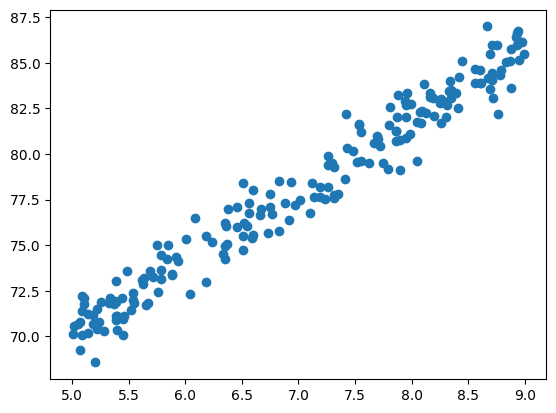

In [6]:
plt.scatter(df["study_hours"], df["student_marks"])

In [7]:
imuate_mean = SimpleImputer(strategy="mean").fit(df[["study_hours"]])

In [8]:
imuate_mean.statistics_

array([6.99594872])

In [9]:
df["study_hours"] = imuate_mean.transform(df[["study_hours"]])

In [10]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

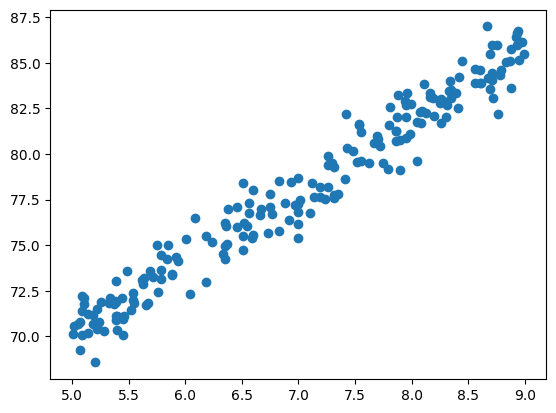

In [11]:
plt.scatter(df["study_hours"], df["student_marks"])

In [12]:
x = df[["study_hours"]]
y = df["student_marks"]

In [13]:
x.shape, y.shape

((200, 1), (200,))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=34, test_size=0.20
)

In [16]:
x_test.shape, x_train.shape

((40, 1), (160, 1))

In [17]:
y_test.shape, y_train.shape

((40,), (160,))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scale = StandardScaler()

In [20]:
x_train = scale.fit_transform(x_train)

In [21]:
x_test = scale.transform(x_test)

In [22]:
x_test

array([[ 0.2820432 ],
       [-0.29795016],
       [ 1.32925344],
       [ 0.4592634 ],
       [ 0.87814749],
       [ 0.68481637],
       [ 0.67676091],
       [-0.86988806],
       [-0.50739221],
       [-1.40154864],
       [ 0.00815745],
       [ 1.54675095],
       [-1.49015874],
       [ 0.24176588],
       [-0.36239387],
       [ 1.11981139],
       [-1.41765957],
       [-1.03905279],
       [-1.35321586],
       [ 0.79759286],
       [ 0.4592634 ],
       [ 0.14510032],
       [-0.74100064],
       [ 1.39369714],
       [ 0.0403793 ],
       [ 1.60313919],
       [ 0.9425912 ],
       [-1.21627298],
       [ 0.99897944],
       [ 0.99092398],
       [ 0.82981471],
       [ 0.78953739],
       [-1.21627298],
       [-0.24156192],
       [-1.36932679],
       [-0.36239387],
       [ 1.03925676],
       [ 1.32119797],
       [-0.2898947 ],
       [ 1.40980807]])

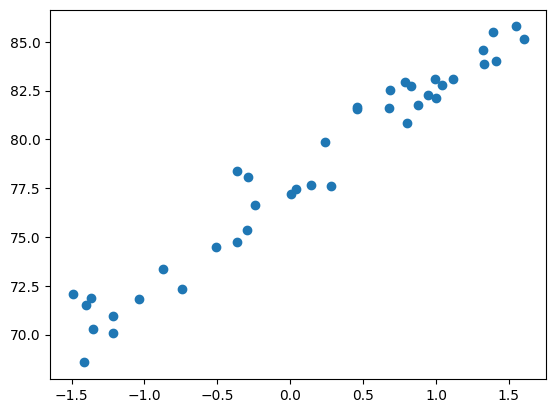

In [23]:
plt.scatter(x_test, y_test)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression = LinearRegression()

In [26]:
regression.fit(x_train, y_train)

LinearRegression()

In [27]:
regression.coef_

array([4.77164809])

In [28]:
regression.intercept_

77.804

In [29]:
y_pred = regression.predict(x_test)

In [63]:
y_pred

array([79.1498109 , 76.38228669, 84.14672962, 79.9954433 , 81.99421079,
       81.07170272, 81.03326488, 73.65320031, 75.38290295, 71.11630312,
       77.84292447, 85.1845512 , 70.69348692, 78.95762172, 76.074784  ,
       83.14734588, 71.03942744, 72.84600575, 71.34693013, 81.60983243,
       79.9954433 , 78.49636769, 74.26820569, 84.45423231, 77.99667581,
       85.45361606, 82.30171348, 72.00037335, 82.57077833, 82.5323405 ,
       81.76358377, 81.57139459, 72.00037335, 76.65135154, 71.27005446,
       76.074784  , 82.76296752, 84.10829179, 76.42072453, 84.53110799])

In [49]:
y_test.values

array([77.59, 75.37, 83.87, 81.67, 81.74, 82.55, 81.6 , 73.34, 74.49,
       71.5 , 77.19, 85.78, 72.08, 79.87, 74.75, 83.08, 68.57, 71.82,
       70.27, 80.86, 81.57, 77.65, 72.33, 85.48, 77.46, 85.15, 82.27,
       70.96, 82.1 , 83.08, 82.75, 82.93, 70.06, 76.63, 71.86, 78.39,
       82.79, 84.58, 78.05, 84.03])

In [67]:
m = pd.DataFrame(x_test)
df2 = pd.DataFrame(y_test.values,columns=['student_mark'])

In [68]:
x_test.shape

(40, 1)

In [69]:
y_test.shape

(40,)

In [62]:
df2["pred_values"] = y_pred

In [64]:
df2['Hours'] = m
df2

,0,pred_values,Hours
0,77.59,79.149811,0.282043
1,75.37,76.382287,-0.297950
2,83.87,84.146730,1.329253
3,81.67,79.995443,0.459263
4,81.74,81.994211,0.878147
5,82.55,81.071703,0.684816
6,81.60,81.033265,0.676761
7,73.34,73.653200,-0.869888
8,74.49,75.382903,-0.507392
9,71.50,71.116303,-1.401549


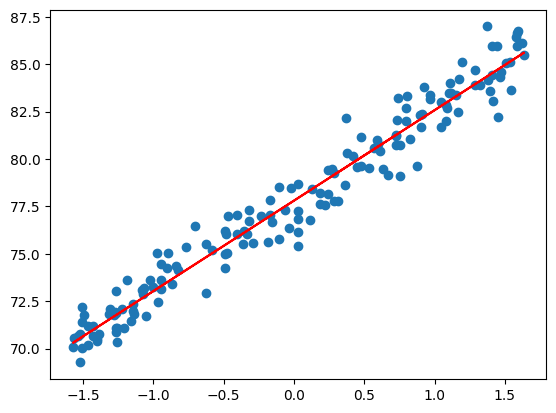

In [35]:
plt.scatter(x_train,y_train)
plt.plot(x_train, regression.predict(x_train),color="red")

In [36]:
regression.predict(x_train)

array([81.2638919 , 70.61661124, 77.94266573, 81.99421079, 84.53110799,
       83.30109722, 70.30910855, 74.15289218, 85.6073674 , 72.2694382 ,
       85.14611337, 72.1541247 , 71.00098961, 73.19194628, 80.07231898,
       77.65073529, 75.53665429, 80.34138383, 79.30356225, 76.99729207,
       77.30479476, 71.80818417, 71.76974633, 76.074784  , 73.65320031,
       76.99729207, 70.69348692, 80.8410757 , 79.1498109 , 84.80017284,
       84.33891881, 73.15350844, 70.53973557, 76.42072453, 74.8063354 ,
       81.34076757, 73.30725978, 81.41764325, 84.72329717, 82.22483781,
       80.64888652, 73.30725978, 82.80140535, 81.64827026, 76.9204164 ,
       83.10890804, 85.33830255, 71.76974633, 71.96193551, 78.84230821,
       70.4628599 , 81.60983243, 79.53418927, 85.37674039, 81.72514594,
       78.41949201, 71.53911931, 73.88382733, 71.11630312, 73.49944897,
       72.34631388, 84.68485933, 71.11630312, 70.61661124, 84.37735664,
       84.45423231, 83.07047021, 77.07416774, 75.57509213, 75.49